In [5]:
import os
import cv2
import numpy as np
from tqdm import tqdm

REBUILD_DATA = False

class DogsVSCats:
    IMG_SIZE = 50
    CATS = "PetImages/Cat"
    DOGS = "PetImages/Dog"
    LABLES = {CATS: 0, DOGS: 1}
    training_data = []
    catcount = 0
    dogcount = 0
    
    def make_training_data(self):
        for label in self.LABLES:
            print(label)
            for f in tqdm(os.listdir(label)):
                try:
                    path = os.path.join(label, f)
                    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
                    img = cv2.resize(img, (self.IMG_SIZE, self.IMG_SIZE))
                    self.training_data.append([np.array(img), np.eye(2)[self.LABLES[label]]])

                    if label == self.CATS:
                        self.catcount += 1
                    elif label == self.DOGS:
                        self.dogcount += 1
                except Exception as e: # incase images are corrupted
                    pass
                
        np.random.shuffle(self.training_data)
        np.save("training_data.npy", self.training_data)
        print("Cats:", self.catcount)
        print("Dogs:", self.dogcount)
        
        
if REBUILD_DATA:
    dogsvcats = DogsVSCats()
    dogsvcats.make_training_data()

In [7]:
training_data = np.load("training_data.npy", allow_pickle=True)

In [8]:
print(len(training_data))

24946


In [12]:
print(training_data[0])

[array([[125, 124, 120, ...,  94, 113,  54],
        [132, 125, 125, ...,  60,  82,  59],
        [124, 134, 123, ...,  54,  72, 129],
        ...,
        [ 57,  51,  45, ...,  77,  67,  62],
        [ 41,  42,  52, ...,  66,  47,  59],
        [ 32,  40,  47, ...,  70,  57,  64]], dtype=uint8) array([0., 1.])]


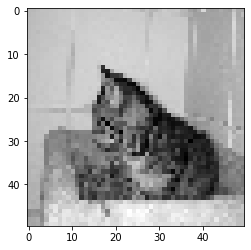

In [15]:
import matplotlib.pyplot as plt

plt.imshow(training_data[1][0], cmap="gray")
plt.show()

In [17]:
training_data[1][1]

array([1., 0.])